In [24]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

alamat = "https://pokemondb.net/pokedex/all"
safeAdd = Request(alamat, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(safeAdd)
data = BeautifulSoup(html, 'html.parser')

In [16]:
import csv
csvi = open("P11.csv", 'w+', newline='')   
writer = csv.writer(csvi) 

In [25]:
table = data.findAll("table",{"class":"data-table block-wide"})[0]

In [4]:
rows=table.findAll('tr')
rowss=rows[0:985]
for row in rowss:
    column= []
    for cell in row.findAll(["td", "th"]):
        isi=cell.get_text()
        column.append(isi)
    try:
        writer.writerow(column)
    except:
        continue

In [26]:
table = data.findAll("table", {"class":"data-table block-wide"})[0]
rows = table.findAll("tr")

hasil = []
rowss=rows[0:985]
for row in rowss:
    info = []
    for cell in row.findAll(["td", "th"]):
        info.append(cell.get_text().strip())
    hasil.append(info)

In [27]:
import pandas as pd
d=pd.DataFrame(hasil)
header = d.iloc[0]
df  = pd.DataFrame(d.values[1:], columns=header)
df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,004,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
979,847,Barraskewda,Water,490,61,123,60,60,50,136
980,848,Toxel,Electric Poison,242,40,38,35,54,35,40
981,849,Toxtricity Low Key Form,Electric Poison,502,75,98,70,114,70,75
982,849,Toxtricity Amped Form,Electric Poison,502,75,98,70,114,70,75


In [28]:
df.describe()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,984,984,984,984,984,984,984,984,984,984
unique,850,984,184,212,100,122,113,117,102,123
top,479,Blastoise,Water,600,60,100,70,40,50,60
freq,6,1,72,44,79,49,68,66,60,54


In [29]:
df.mean()

0
#          inf
Total      inf
HP         inf
Attack     inf
Defense    inf
Sp. Atk    inf
Sp. Def    inf
Speed      inf
dtype: float64

In [30]:
df['Attack']=pd.to_numeric(df['Attack'])
df['Defense']=pd.to_numeric(df['Defense'])

In [31]:
df.mean()

0
#                inf
Total            inf
HP               inf
Attack     79.696138
Defense    74.101626
Sp. Atk          inf
Sp. Def          inf
Speed            inf
dtype: float64

In [32]:
#aneh nya clustering wkt blm di pd.to_numeric hasilnya sama aja
x = df.iloc[:,5:7]
x

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
...,...,...
979,123,60
980,38,35
981,98,70
982,98,70


In [33]:
import matplotlib.pyplot as plt
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [34]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2,
       0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 1,

In [35]:
# Create a copy of the data
data_with_clusters = df.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
0,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,0
1,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60,0
2,003,Venusaur,Grass Poison,525,80,82,83,100,100,80,1
3,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80,1
4,004,Charmander,Fire,309,39,52,43,60,50,65,0
...,...,...,...,...,...,...,...,...,...,...,...
979,847,Barraskewda,Water,490,61,123,60,60,50,136,2
980,848,Toxel,Electric Poison,242,40,38,35,54,35,40,0
981,849,Toxtricity Low Key Form,Electric Poison,502,75,98,70,114,70,75,2
982,849,Toxtricity Amped Form,Electric Poison,502,75,98,70,114,70,75,2


In [36]:
data_with_clusters.to_csv('ClusteringPokemon.csv',index=False)


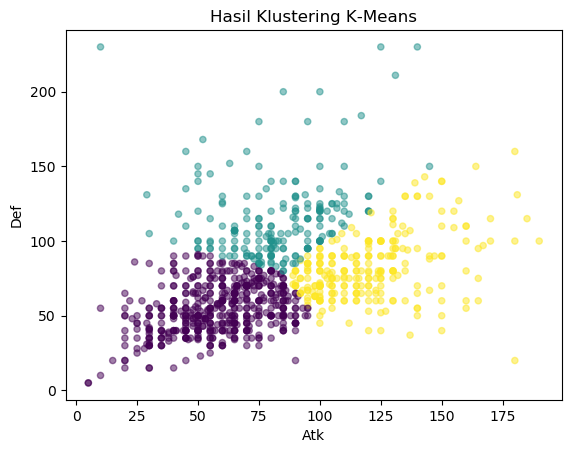

In [37]:
plt.style.use('default')
plt.scatter(data_with_clusters['Attack'],data_with_clusters['Defense'],c=data_with_clusters['Cluster'],marker='o',s=20,alpha=0.5)
plt.xlabel('Atk')
plt.ylabel('Def')
plt.title('Hasil Klustering K-Means')

plt.show()

In [31]:
plt.style.available?

In [ ]:
#bs jg lo pake np.log(hasil['Attack'])
#hasilnya bertingkat

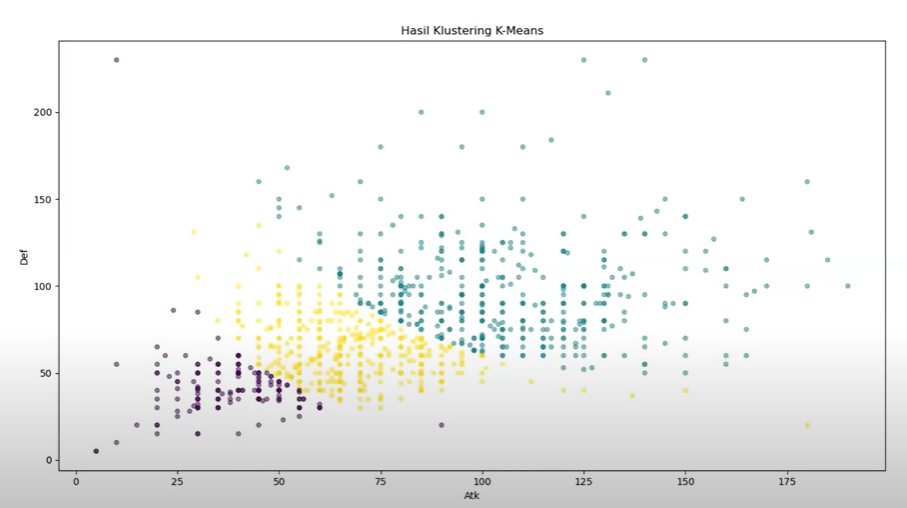

In [ ]:
insight=bs itung brp jml yg clsuter 1 dll, buat regresi

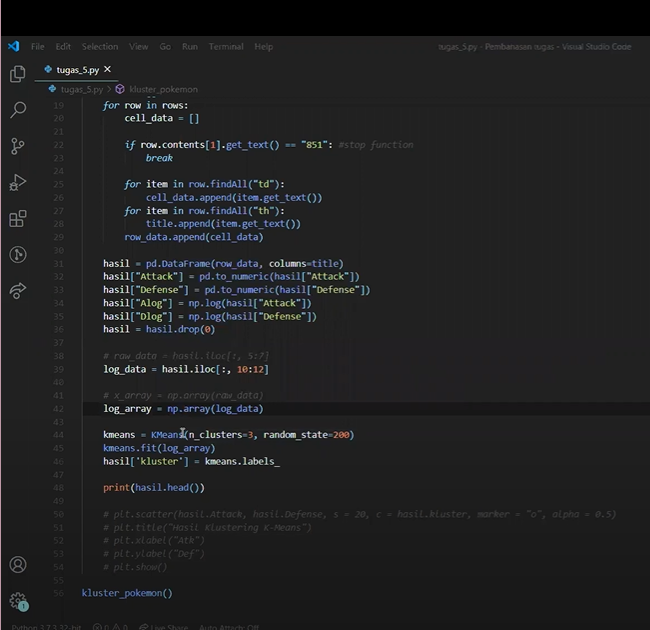

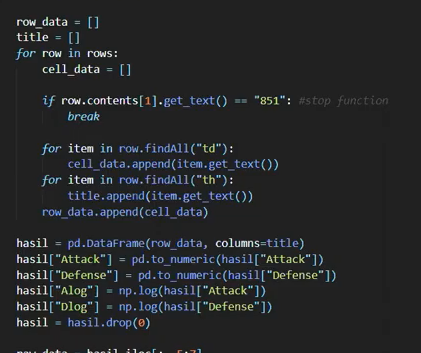

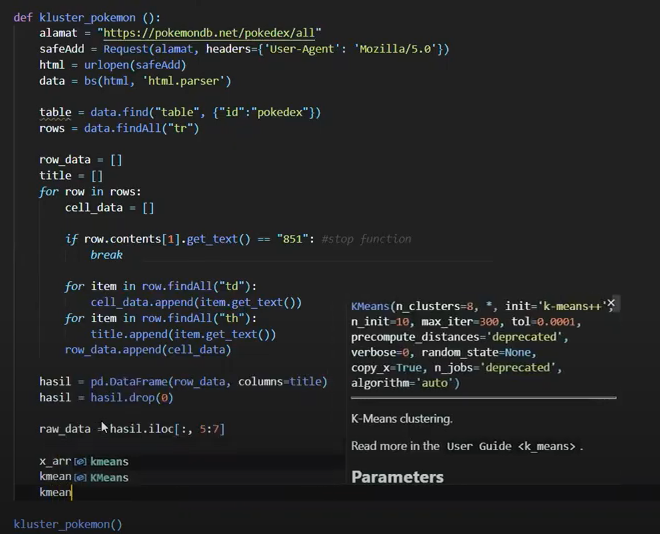